In [1]:
#載入需要的套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import *
from statsmodels.tsa import stattools

%matplotlib inline

#載入過去五年的歐元兌美元匯率資料
FX_data = pd.read_csv(r'C:\Users\npc94\OneDrive\桌面\EURUSD=X.csv',index_col=0,parse_dates=True)

In [2]:
#轉換資料
data=pd.DataFrame(FX_data['Close'])
data['returns']= np.log(data/data.shift(1))
data.dropna(inplace=True)

In [3]:
#建立一個空的列表物件實例，以收集綜列的名稱
lags=10
cols=[]
for lag in range(1,lags+1):
    col=f'lag_{lag}'       #為綜列名稱建立一個str字串物件
    data[col]=FX_data['Close'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [7]:
#載入所需套件
from sklearn import linear_model
from sklearn.metrics import accuracy_score
#建立模型物件實例時，設定一個C值正則化項得到比較小的權重
lm=linear_model.LogisticRegression(C=1e7,solver='lbfgs',multi_class='auto',max_iter=1000)

In [10]:
#把要預測的報籌正負號套入到模型中
lm.fit(data[cols], np.sign(data['returns']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [11]:
#在DataFrame建立一個新的縱列，把要預測值寫入其中
data['prediction']=lm.predict(data[cols])

In [12]:
#針對所得的結果，分別顯示看多與看空的次數
data['prediction'].value_counts()

 1.0    682
-1.0    580
Name: prediction, dtype: int64

In [13]:
#分別計算出預測正確與錯誤的次數
hits = np.sign(data['returns'].iloc[lags:]*data['prediction'].iloc[lags]).value_counts()

In [14]:
hits

-1.0    630
 1.0    618
 0.0      4
Name: returns, dtype: int64

In [15]:
#在這個例子中的準確度
accuracy_score(data['prediction'], np.sign(data['returns']))

0.5380348652931854

In [16]:
#這個策略的總體績效表現
data['strategy']=data['prediction']*data['returns']
data[['returns','strategy']].sum().apply(np.exp)

returns     1.037625
strategy    1.250676
dtype: float64

<AxesSubplot:xlabel='Date'>

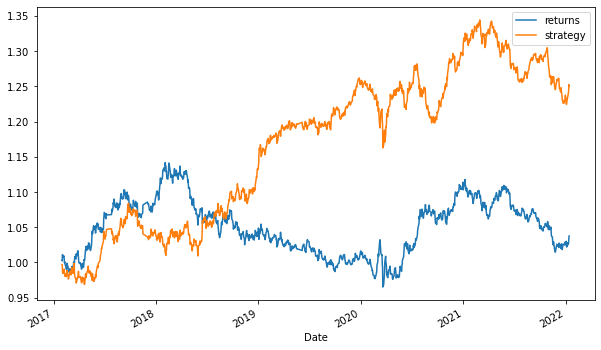

In [17]:
#將策略績效表現與基準做比較
data[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))